**ENGY-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2024; Prof. V. F. de Almeida

# Neutron Diffusion on a Spherical Domain
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\ihat}{\hat{\boldsymbol{i}}}
  \newcommand{\rhat}{\hat{\boldsymbol{r}}}
$

**Student: Melanie Breeze**  <br>
**Course:** ENGY-4390 Nuclear Systems Design and Analysis  <br>
**Advisor and Collaborator: Valmor F. de Almeida** 

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**07Oct2024**

## Introduction

Neutron diffusion from a spherical source is a classical problem in neutron transport. This project investigates the solution of the source problem using 2 different approaches, namely the analyical solution, and the finite element method using a Python implementation from the Engy-5330 course.

### Summary of Parameters

$$
\begin{aligned}
& \text {Table 1. Parameter summary}\\
&\begin{array}{l|c|r}
\hline \hline \text { Parameter } & \text { Definition } & \text { Units } \\
\hline
r & \text{Radius} & \mathrm{cm} \\
R & \text{Outer radius of region 1} & \mathrm{cm} \\
R_\infty & \text{Outer radius of region 2} & \mathrm{cm} \\
D & \text{Diffusion coefficient} & \mathrm{cm} \\
\Sigma_\mathrm{a} & \text{Macroscopic cross section} & \mathrm{cm^{-1}} \\
L & \text{Length term, } L = \sqrt{D/\Sigma_\mathrm{a}} & \mathrm{cm} \\
u & \text{Neutron velocity} & \mathrm{s^{-1}~cm^{-2}} \\
q & \text{Neutron normal flux} & \mathrm{cm~s^{-1}} \\
s_0 & \text{Source term}& \mathrm{cm^3~s^{-1}} \\
c & \text{Constants of integration} & \mathrm{cm^{-1}~s^{-1}} \\
A & \text{Surface area} & \mathrm{cm^2} \\
V & \text{Volume} & \mathrm{cm^3} \\
\hline
\end{array}
\end{aligned}
$$

## Objectives

 + Solve a 1-D neutron diffusion from a point source problem using two regions in spherical coordinates.
   - Region 1 is the sphere source (with finite radius)
   - Region 2 is the universe around the source (finite but very large to represent a boundless region)  

## Boundary-Value Problem Statement
Solve the heterogeneous spatial neutron flux magnitude diffusion problem. Find the spatial neutron flux magnitude in the region 1, $u_1:[0,R]\subset\Reals\rightarrow\Reals$, and the spatial neutron flux magnitude in the region 2, $u_2:[R,R_\infty]\subset\Reals\rightarrow\Reals$
such that:

\begin{align*}
 -\frac{1}{r^2}\bigl(-D_1\, r^2 u_1'\bigr)'(r) - \Sigma_{a,1}\,u_1(r) + s_0^{(1)} &= 0 \quad\quad \forall \quad\quad r\in\ ]0,R[, \\
 -\frac{1}{r^2}\bigl(-D_2\, r^2 u_2'\bigr)'(r) - \Sigma_{a,2}\,u_2(r) + s_0^{(2)} &= 0 \quad\quad \forall \quad\quad r\in\ ]R,R_\infty[, \\
 q_{1,n}(0) &= 0, \\
 q_{2,n}(\infty) &= q_{2,n\infty}, \\
 u_1(R) &= u_2(R), \\
 q_{1,n}(R) &= q_{2,n}(R), \\
\end{align*}
   
Given data: diffusion coefficients, $D$, macroscopic absorption cross sections, $\Sigma_a$, source $s_0$, boundary conditions of normal flux, and continuity conditions at the interfaces (both normal flux and solution). Where $q_{i,n}(r) = \flux_{i}(r)\cdot\normal(r) = -D_i\,u_i'(r)\,\rhat \cdot \normal(r) \ \forall \ i=1,2$.

## Alternative Boundary-Value Problem Statement

Solve the equivalent heterogeneous spatial neutron flux magnitude diffusion problem. Find the spatial neutron flux magnitude on all regions, $u:[0,R_\infty]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\frac{1}{r^2}\bigl(-D(r)\, r^2 u'\bigr)'(r) - \Sigma_a(r)\,u(r) + s_0(r) &= 0 \quad\quad \forall \quad\quad r\in\ ]0,R_\infty[, \\
 q_n(0) &= 0, \\
 q_n(R_\infty) &= q_{nR_\infty}, \\
\end{align*}
   
Given data: diffusion coefficient, $D(r)$, macroscopic absorption cross section, $\Sigma_a(r)$, source $s_0(r)$, and normal flux boundary conditions. Where $q_n(r) = \flux(r)\cdot\normal(r) = -D(r)\,u_i'(r)\,\rhat \cdot \normal(r)$.

## Finite Sphere in an Infinite Domain

Consider an inner sphere source with a given radius surrounded by annular region with a large radius. This scenario mimics a spherical source case in an infinite domain. We cannot have a real infinite domain in a simulation, therefore a large outer radius will do it.

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.mm = unit.milli*unit.meter
unit.um = unit.micro*unit.meter

In [2]:
'''Domain'''
# case 1
r_0 = 0*unit.cm 
r_R = 10*unit.cm
r_oo = 100*unit.cm  # infinity

# case 2
r_0 = 0*unit.cm 
r_R = 100*unit.cm
r_oo = 300*unit.cm  # infinity

In [3]:
'''Domain'''
def show_domain(r_R, r_oo):
    import pyvista as pv
    pv.set_plot_theme('paraview')

    radius_i = r_R
    radius_o = r_oo
    outer = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_o)
    inner = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_i)

    plo = pv.Plotter(notebook=True, shape=(1,1), off_screen=True) 
    plo.subplot(0,0)
    plo.add_mesh(outer, color='yellow', opacity=0.59,)
    plo.add_mesh(inner, color='red', opacity=1)
    plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Phi')
    plo.screenshot('domain.png', window_size=(1000,400))
    plo.camera.zoom(1.8)
    #cpos = plo.show(window_size=(1000, 400), auto_close=False)
    return plo

In [4]:
#plo = show_domain(r_R, r_oo)

In [5]:
#import matplotlib.pyplot as plt
#plt.figure(1, figsize=(100, 10))
#plt.imshow(plo.image)
#plt.show()

### Data

Solve problem with parameter values:

> + $R$, $R_\infty$
> + $D_1$, $\Sigma_{a1}$, $s_{01}$
> + $D_2$, $\Sigma_{a2}$, $s_{02}$
> + $q_{nR_\infty}$

## Galerkin Method w/ Finite Element Basis Functions

The Galerkin weak formulation is as follows. Find $u \in H^1\!\bigl([0,R_\infty]\bigr)$ so that 

\begin{align*}
\bigl(-D\, u',v'\bigr) - \bigl(\Sigma_a\,u,v\bigr) + \bigl(s_0,v\bigr) + q_n(R_\infty)\,v(R_\infty)\,R^2_\infty &= 0 \quad\quad \forall \quad\quad v \in H^1\!\bigl([0,R_\infty]\bigr), 
\end{align*}

where $H^1\!\bigl([0,R_\infty]\bigr) := \bigl\{ u:[0,R_\infty]\subset\Reals\rightarrow \Reals \mid \bigl(u',u'\bigr) + \bigl(u,u\bigr) < \infty\bigr\}$. Because $u$ and $v$ belong to the same space of functions, this variational form is called the Galerkin's variational form. Choosing a finite dimensional subspace of $H^1\!\bigl([0,R_\infty]\bigr)$, say $V_N([0,R_\infty]) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \bigr\} \subset H^1\!\bigl([0,R_\infty]\bigr)$, where $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(0,R_\infty)$, the coefficients $\cvec := \{c_i\mid i=1,\ldots,N\}$ can be computed by solving the linear system of algebraic equations

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $
  + $b_i = (s_0,\phi_i) - q_{nR_\infty}\,\phi_i(R_\infty)\,R^2_\infty$
  
Note: this method is identical to the Rayleigh-Ritz method, therefore the approximate solution  $u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i$ is a minimizer of a particular norm (*i.e.* the energy norm). In addition, in spherical coordinates, the inner products read

\begin{align*}
\bigl(-D\, u',v'\bigr) &= \int\limits_0^{R_\infty} D(r)\, u'(r)\,v'(r)\, r^2\,dr  \\
\bigl(\Sigma_a\,u,v\bigr) &= \int\limits_0^{R_\infty} \Sigma_a(r)\,u(r)\,v(r)\,r^2\,dr \\
\bigl(s_0,v\bigr) &= \int\limits_0^{R_\infty} s_0(r)\,v(r)\,r^2\,dr
\end{align*}

In [6]:
'''Parameters and data'''
import math

# Source
diffusion_coeff_1 = 1.5*unit.cm
sigma_a_1 = 0.005/unit.cm
source_1_dot = 1/unit.second
volume = 4/3*math.pi*(r_R)**3
source_1 = source_1_dot/volume

# Right side material
diffusion_coeff_2 = 1.0*unit.cm
sigma_a_2 = 0.01/unit.cm
source_2 = 0./unit.cm**3/unit.second

# normal flux
q_noo = 0.0*unit.cm**2/unit.second

In [7]:
print('s_1 [#/cm^3-s] = ', source_1*unit.cm**3*unit.second)

s_1 [#/cm^3-s] =  2.3873241463784306e-07


In [8]:
'''Diffusion lengths'''
import math
diffusion_length_1 = math.sqrt(diffusion_coeff_1/sigma_a_1)
print('L1 [cm] = %2.3e'%(diffusion_length_1/unit.cm))
diffusion_length_2 = math.sqrt(diffusion_coeff_2/sigma_a_2)
print('L2 [cm] = %2.3e'%(diffusion_length_2/unit.cm))

L1 [cm] = 1.732e+01
L2 [cm] = 1.000e+01


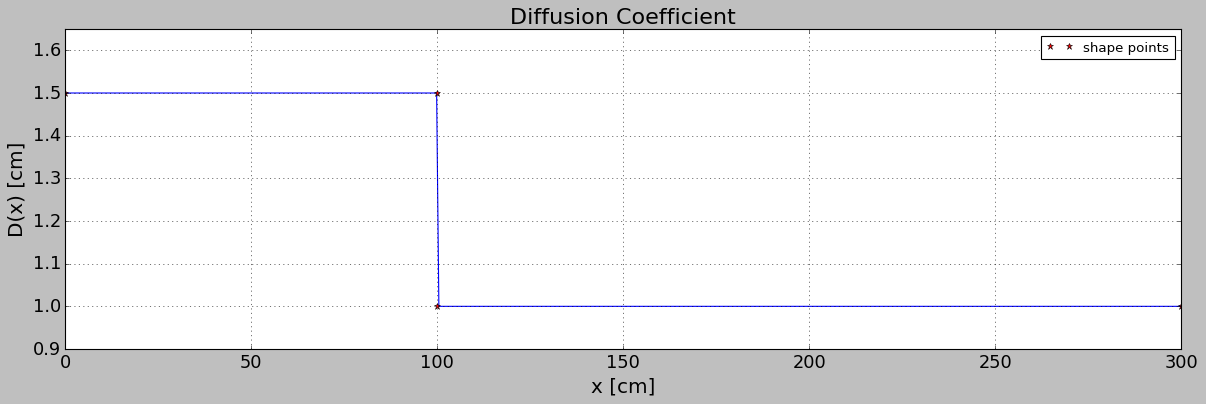

In [9]:
'''Diffusion coefficient function'''
from pyfem1d.toolkit import TargetFunction   

shape_pts = [(r_0, diffusion_coeff_1), (r_R, diffusion_coeff_1), 
             (r_R, diffusion_coeff_2), (r_oo, diffusion_coeff_2)]

diffusion_coeff = TargetFunction(shape_pts, type='linear')
  
diffusion_coeff.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Diffusion Coefficient', y_label=r'D(x) [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm, y_scale=1/unit.cm,
                ylim=[min(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*.9, 
                      max(diffusion_coeff_1, diffusion_coeff_2)/unit.cm*1.1])

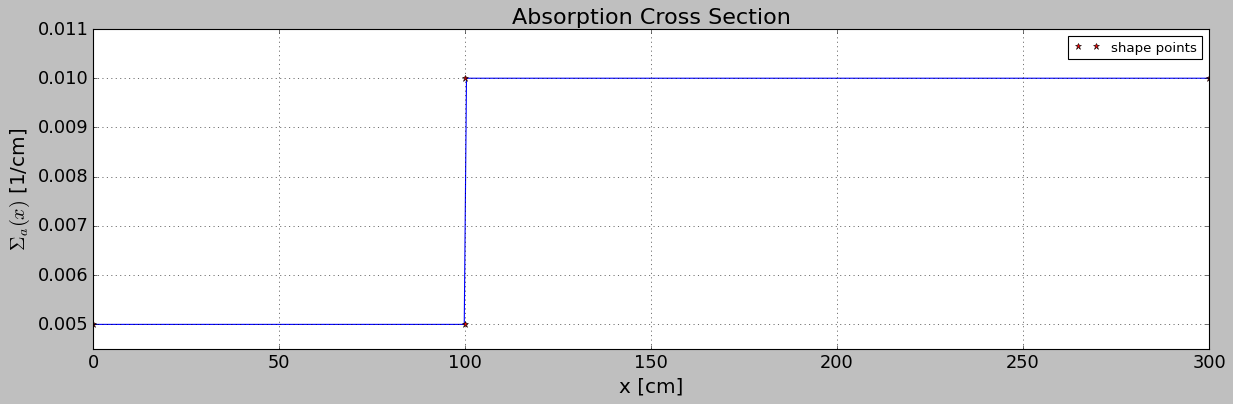

In [10]:
'''Absoption cross section function'''
from pyfem1d.toolkit import TargetFunction   

shape_pts = [(r_0, sigma_a_1), (r_R, sigma_a_1), 
             (r_R, sigma_a_2), (r_oo, sigma_a_2)]

sigma_a = TargetFunction(shape_pts, type='linear')
  
sigma_a.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Absorption Cross Section', y_label=r'$\Sigma_a(x)$ [1/cm]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm,
             ylim=[min(sigma_a_1, sigma_a_2)*unit.cm*.9, 
                   max(sigma_a_1, sigma_a_2)*unit.cm*1.1])

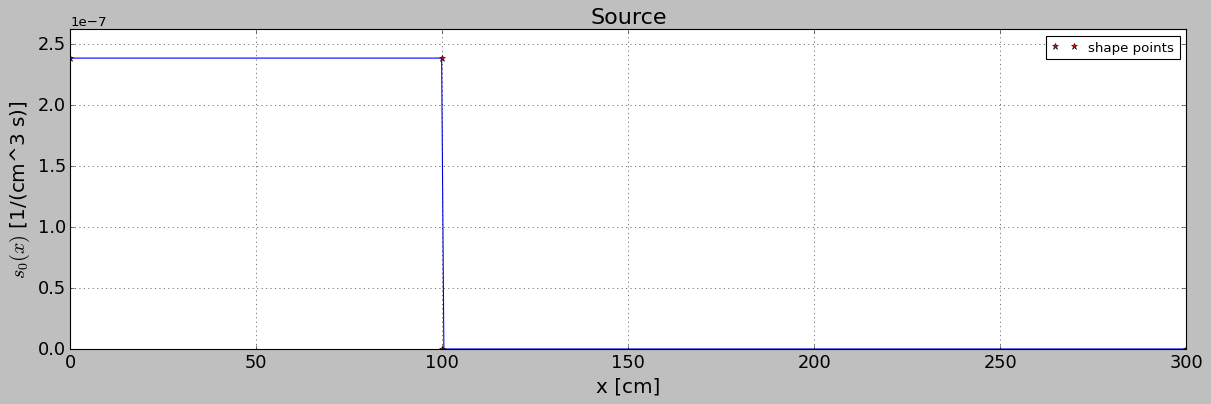

In [11]:
'''Source function'''
from pyfem1d.toolkit import TargetFunction

shape_pts = [(r_0, source_1), (r_R, source_1), 
             (r_R, source_2), (r_oo, source_2)]

source = TargetFunction(shape_pts, type='linear')
  
source.plot(n_plot_pts=500, show_shape_pts=True, 
             title='Source', y_label=r'$s_0(x)$ [1/(cm^3 s)]', x_label='x [cm]', 
             x_scale=1/unit.cm, y_scale=unit.cm**3*unit.second,
             ylim=[min(source_1, source_2)*unit.cm**3*unit.second*.9, 
                   max(source_1, source_2)*unit.cm**3*unit.second*1.1])

### Finite Element Basis Functions

Specify basis functions distribution on the material domain and degree.

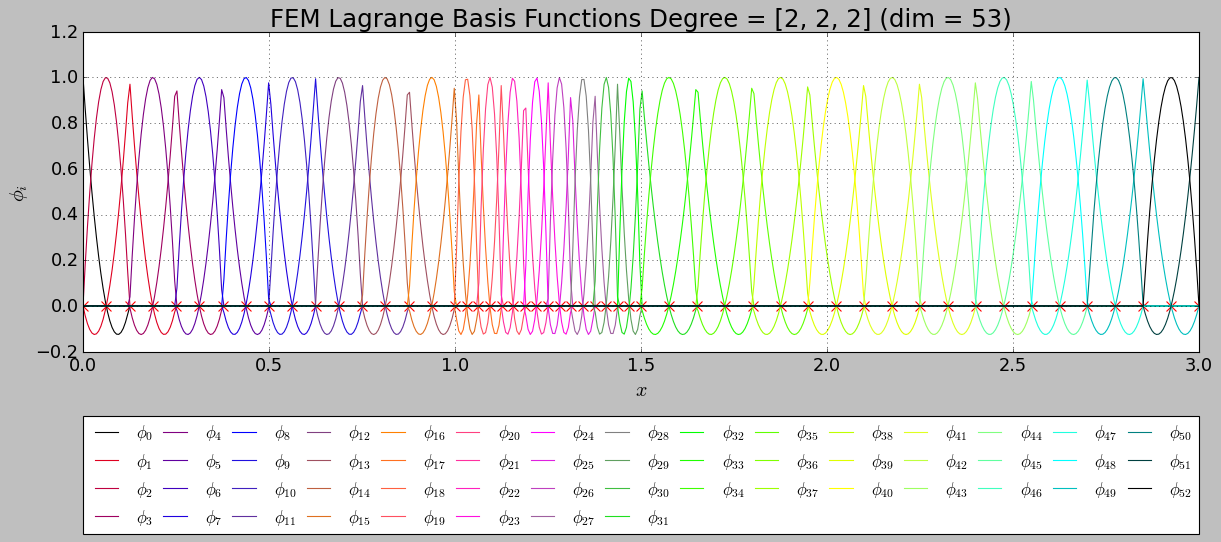

In [47]:
'''Build basis functions'''
from pyfem1d.toolkit import LagrangeFEMBasis 

degree = [2,2,2]
n_elem = [8,8,10]

#femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[r_0, r_R, r_R+2*unit.cm, r_oo]) # (0, 10, 100 case)
femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[r_0, r_R, r_R+50*unit.cm, r_oo])# (0, 100, 300 case
femlb.plot(n_plot_pts=500, n_legend_cols=15)

  + $A_{i,j} = (D\,\phi'_j,\phi'_i) + (\Sigma_a\,\phi_j,\phi_i) $

In [48]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(diffusion_coeff, "u'", "v'", coord_sys='spherical')
a_mtrx = femlb.inner_product_matrix(sigma_a, 'u', 'v', coord_sys='spherical')

a_mtrx = d_mtrx + a_mtrx

In [49]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx, tol=1e-6) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

import numpy as np
print(np.linalg.matrix_rank(a_mtrx), a_mtrx.shape)

matrix is full rank.
53 (53, 53)


 + $b_i = (s_0,\phi_i) - q_{nR_\infty}\,\phi_i(R_\infty)\,R^2_\infty$

In [50]:
'''Build the load vector'''

s_vec = femlb.inner_product_vector(source, 'v', coord_sys='spherical')
qnoo_vec = femlb.boundary_inner_product_vector('right', lambda x: q_noo * r_oo**2, 'v')

b_vec = s_vec - qnoo_vec

In [51]:
'''Compute optimal coefficient eigenvectors'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [52]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u = femlb.evaluation_matrix(x)@c_star_vec
    return u

In [53]:
'''Build the best approximation function in V_N'''

def u_prime_star(x):
    u_prime = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_prime

## Results and Analysis
Much can be exercised in terms of results by varying the parameters of the problem.

In [54]:
'''Plot solution'''

def plot_solution(x, u_values, q_values, 
                  u_legend='Solution w/ Neumann BC', 
                  q_legend='Flux w/ Neumann BC'):
    
    import matplotlib.pyplot as plt
    (fig, ax1) = plt.subplots(1, figsize=(14, 6))

    ax1.plot(x/unit.cm, u_values*unit.cm**2*unit.second, 'r-', label=u_legend)

    ax1.set_xlabel(r'$r$ [cm]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$', fontsize=18, color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='best', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)

    # create a twin x axis to be shared
    ax2 = ax1.twinx()

    ax2.plot(x/unit.cm, q_values*unit.cm**2*unit.second, 'b-', label=q_legend)

    ax2.set_ylabel(r"$q_h(x)$", fontsize=18, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue', labelsize=14)
    ax2.legend(loc='center right', fontsize=12)
    #ax2.set_ylim(0,2)
    #ax2.grid(True)

    plt.title(r'Galerkin Method with Finite Element Lagrange Basis Functions (n='+str(len(femlb.basis_func_list))+')', fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

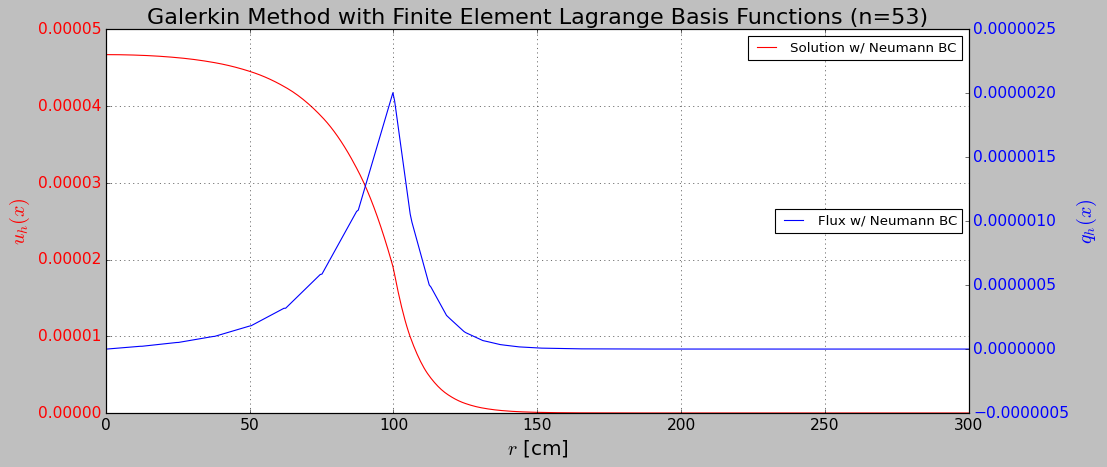

In [55]:
n_pts = 500
x = np.linspace(0, r_oo, n_pts)
u_values = u_star(x)
q_values = -diffusion_coeff(x)*u_prime_star(x)

plot_solution(x, u_values, q_values)

In [56]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N:')
print('u^*_N(0) [cm^2/s]= ', u_star(0)*unit.cm**2*unit.second, '  u^*_N(Roo) [cm^2/s]= ', u_star(r_oo)*unit.cm**2*unit.second)
print('')
print("u^*'_N")
print("u^*'_N(0) [cm/s]= ", u_prime_star(0)*unit.cm*unit.second, " u^*'_N(Roo) [cm/s]= ", u_prime_star(r_oo)*unit.cm*unit.second)
print('')
print('x=0')
print('u^*_N(0) [cm^2/s]= ', u_star(0.0)*unit.cm**2*unit.second)
print("u^*'_N(0) [cm/s]= ", u_prime_star(0.0)*unit.cm*unit.second)

u^*_N:
u^*_N(0) [cm^2/s]=  [4.67057e-05]   u^*_N(Roo) [cm^2/s]=  [2.83765e-14]

u^*'_N
u^*'_N(0) [cm/s]=  [4.3947e-06]  u^*'_N(Roo) [cm/s]=  [4.14484e-12]

x=0
u^*_N(0) [cm^2/s]=  [4.67057e-05]
u^*'_N(0) [cm/s]=  [4.3947e-06]


In [22]:
'''Flux at origin boundary'''

print('q_n0 given    [cm2/s]= ', 0)
print('q_n0 computed [cm2/s]= ', -(-diffusion_coeff(0)*u_prime_star(0))*unit.cm**2*unit.second)
#print('flux error [%]= ',(diffusion_coeff(x_a)*u_prime_star(x_a) - q_na)/q_na*100*unit.cm**2*unit.second)

q_n0 given    [cm2/s]=  0
q_n0 computed [cm2/s]=  [2.81474e-09]


In [23]:
'''Flux at right boundary'''

print('q_noo given    [cm^2/s]= ', q_noo)
print('q_noo computed [cm^2/s]= ', -diffusion_coeff(r_oo)*u_prime_star(r_oo)*unit.cm**2*unit.second)
#print('flux error [%]= ',(-diffusion_coeff(x_b)*u_prime_star(x_b) - q_nb)/q_nb*100*unit.cm**2*unit.second)

q_noo given    [cm^2/s]=  0.0
q_noo computed [cm^2/s]=  [-4.15881e-16]


In [24]:
x_vec = np.linspace(0, r_oo, 21)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

print('r [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_N_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, u_n, q_N))

r [cm]        u_n [#/cm^2/s]    q_N [#/cm^2/s]
+0.00000e+00   +4.66921e-05     -2.81474e-09
+1.50000e+01   +4.65633e-05     +2.85873e-08
+3.00000e+01   +4.60991e-05     +7.18587e-08
+4.50000e+01   +4.50855e-05     +1.45048e-07
+6.00000e+01   +4.29455e-05     +2.82957e-07
+7.50000e+01   +3.85849e-05     +6.15888e-07
+9.00000e+01   +2.97336e-05     +1.31346e-06
+1.05000e+02   +1.08759e-05     +1.25206e-06
+1.20000e+02   +2.12572e-06     +1.94663e-07
+1.35000e+02   +4.22003e-07     +4.75479e-08
+1.50000e+02   +8.47203e-08     +4.10615e-08
+1.65000e+02   +1.72891e-08     +1.06509e-09
+1.80000e+02   +3.55756e-09     +2.20040e-10
+1.95000e+02   +7.37140e-10     +4.57352e-11
+2.10000e+02   +1.53645e-10     +9.55645e-12
+2.25000e+02   +3.21886e-11     +2.00612e-12
+2.40000e+02   +6.77360e-12     +4.22852e-13
+2.55000e+02   +1.43116e-12     +8.94386e-14
+2.70000e+02   +3.04172e-13     +1.89146e-14
+2.85000e+02   +6.79825e-14     +5.68394e-15
+3.00000e+02   +2.84721e-14     -4.15881e-16


In [25]:
x_vec/unit.cm

array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.,
       165., 180., 195., 210., 225., 240., 255., 270., 285., 300.])

In [26]:
u_n_vec

array([4.66921e-05, 4.65633e-05, 4.60991e-05, 4.50855e-05, 4.29455e-05,
       3.85849e-05, 2.97336e-05, 1.08759e-05, 2.12572e-06, 4.22003e-07,
       8.47203e-08, 1.72891e-08, 3.55756e-09, 7.37140e-10, 1.53645e-10,
       3.21886e-11, 6.77360e-12, 1.43116e-12, 3.04172e-13, 6.79825e-14,
       2.84721e-14])

In [27]:
q_N_vec

array([-2.81474e-09,  2.85873e-08,  7.18587e-08,  1.45048e-07,
        2.82957e-07,  6.15888e-07,  1.31346e-06,  1.25206e-06,
        1.94663e-07,  4.75479e-08,  4.10615e-08,  1.06509e-09,
        2.20040e-10,  4.57352e-11,  9.55645e-12,  2.00612e-12,
        4.22852e-13,  8.94386e-14,  1.89146e-14,  5.68394e-15,
       -4.15881e-16])

In [28]:
'''Save text file with values'''

x_vec = np.linspace(0, r_oo, 5000)
u_n_vec = u_star(x_vec)*unit.cm**2*unit.second
q_N_vec = -diffusion_coeff(x_vec)*u_prime_star(x_vec)*unit.cm**2*unit.second

np.savetxt('data/neutron-ball-source-inf.txt', (x_vec/unit.cm, u_n_vec, q_N_vec), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('line-source-inf.txt')

## Conclusions

- Text...

## References

- [1] V. F. de Almeida, [*Engy-5330: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] V. F. de Almeida, [*Engy-5050: Nuclear Reactor Physics: Neutron Diffusion from a Point Source*](https://nbviewer.org/github/dpploy/engy-5050/blob/main/notebooks/03-diff-point-source.ipynb), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).